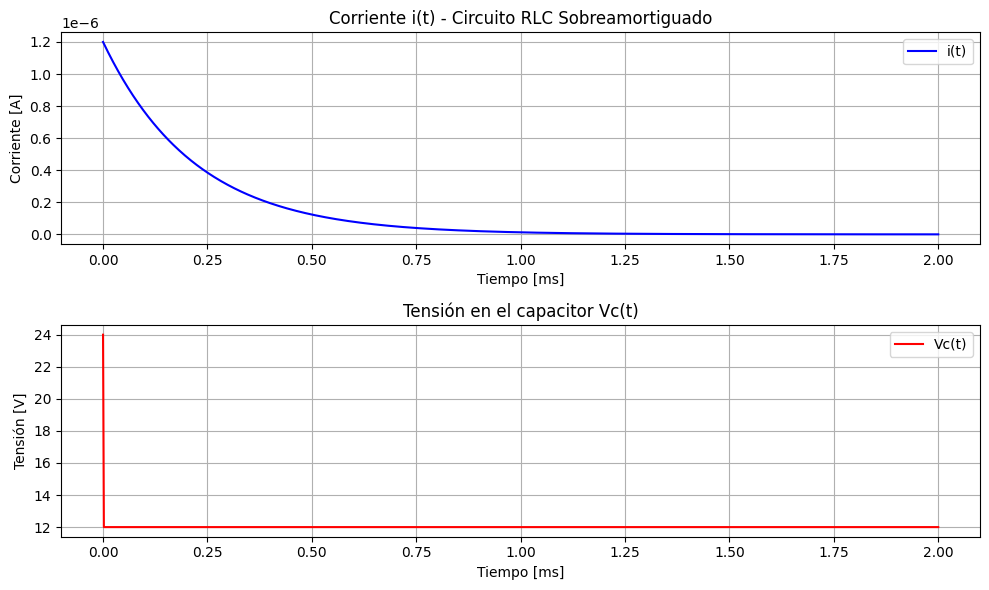

In [1]:
# Simulación analítica del circuito RLC sobreamortiguado
# TP1 - Actividad 2

import numpy as np
import matplotlib.pyplot as plt

# ----- Parámetros del sistema -----
R = 2200          # Ohm
L = 10e-6         # Henrio
C = 100e-9        # Faradio
Ve = 12           # Voltios (escalón unitario de 12V)

t = np.linspace(0, 0.002, 1000)  # Tiempo en segundos (respuesta rápida, por eso corto)

# ----- Cálculo de los coeficientes -----
delta = R**2 - 4*L/C
s1 = (-R + np.sqrt(delta)) / (2*L)
s2 = (-R - np.sqrt(delta)) / (2*L)

# ----- Corriente i(t) -----
# Condiciones iniciales: i(0) = 0, Vc(0) = 0
# Se obtiene de la solución de la ecuación diferencial con entrada escalón
A1 = Ve / (L * (s1 - s2)) * (-1/s1)
A2 = -Ve / (L * (s1 - s2)) * (-1/s2)
i_t = A1 * np.exp(s1 * t) + A2 * np.exp(s2 * t)

# ----- Tensión en el capacitor Vc(t) -----
Vc_t = Ve * (1 + (s1 * np.exp(s1 * t) - s2 * np.exp(s2 * t)) / (s1 - s2))

# ----- Gráficos -----
plt.figure(figsize=(10, 6))

# Corriente
plt.subplot(2, 1, 1)
plt.plot(t * 1000, i_t, label='i(t)', color='blue')
plt.title('Corriente i(t) - Circuito RLC Sobreamortiguado')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Corriente [A]')
plt.grid(True)
plt.legend()

# Tensión en el capacitor
plt.subplot(2, 1, 2)
plt.plot(t * 1000, Vc_t, label='Vc(t)', color='red')
plt.title('Tensión en el capacitor Vc(t)')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Tensión [V]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
